In [3]:
class Point:
    def __init__(self, x, y) -> None:
        self.x = x
        self.y = y
        
    def __eq__(self, value: object) -> bool:
        if isinstance(value, Point):
            if value.x == self.x and value.y == self.y:
                return True
        return False
    
    def __hash__(self) -> int:
        return hash((self.x, self.y))
    
    def __str__(self) -> str:
        return f"({self.x}, {self.y})"
    
    def __repr__(self) -> str:
        return f"({self.x}, {self.y})"

In [32]:
import random
import pickle

def generate_points(num_points=100, wide=100, length=100, save=False):
    
    points = []
    for _ in range(num_points):
        x = random.uniform(0, wide)
        y = random.uniform(0, length)
        points.append(Point(x, y))
    
    if save:
        save_path = f"./data/Exp1/{num_points}points.pkl"    
        with open(save_path, "wb") as f:
            pickle.dump(points, f)
    
    return points

In [33]:
# points = generate_points(num_points=10, save=True)

In [34]:
def get_points(path):
    with open(path, "rb") as f:
        points = pickle.load(f)
    return points

In [35]:
points = get_points("./data/Exp1/100points.pkl")

In [36]:
def cal_cross_product(v1: Point, v2: Point):
    """计算向量v1和向量v2的叉积，这里的向量用点表示，因为都是2维的

    Args:
        X (Point): _description_
        Y (Point): _description_
    """
    
    return v1.x * v2.y - v1.y * v2.x

In [37]:
import copy
def cal_g(A: Point, B: Point, P: Point):
    """计算g,g>0则P在AB上面
        实际上是向量AB和向量AP的叉积
    Args:
        A (Point)
        B (Point)
        P (Point)
    """
    # if A.x >= B.x:
    #     C = copy.deepcopy(B)
    #     B = copy.deepcopy(A)
    #     A = copy.deepcopy(C)
    
    AB = Point(B.x - A.x, B.y - A.y)
    AP = Point(P.x - A.x, P.y - A.y)
    
    g = cal_cross_product(AB, AP)
    return g

In [38]:
def in_triangle(A: Point, B: Point, C: Point, P: Point) -> bool:
    """判断P在不在ABC的三角形内

    Args:
        A (Point)
        B (Point)
        C (Point)
        P (Point)

    Returns:
        bool
    """
    
    if (cal_g(A, B, P) * cal_g(A, B, C) >= 0
        and cal_g(A, C, P) * cal_g(A, C, B) >= 0
        and cal_g(B, C, P) * cal_g(B, C, A) >= 0):
        return True
    else:
        return False

In [39]:
# points = [
#     Point(0, -0.25),
#     Point(1, 0),
#     Point(0, 1),
#     Point(0.25, 0.25),
#     Point(-0.5, -1),
#     Point(-1, 0.5),
# ]

In [40]:
from tqdm import tqdm
def BruteForceCH(points, logger=None):
    in_flag = set()
    for A in tqdm(points):
        for B in points:
            if A == B:
                continue
            for C in points:
                if C == A or C == B:
                    continue
                for D in points:
                    if D == A or D == B or D == C:
                        continue
                    
                    if in_triangle(A, B, C, D):
                        in_flag.add(D)
                    if in_triangle(A, B, D, C):
                        in_flag.add(C)
                    if in_triangle(A, C, D, B):
                        in_flag.add(B)
                    if in_triangle(B, C, D, A):
                        in_flag.add(A)
                        
                        
    edge_points = [p for p in points if p not in in_flag]
    edge_points.sort(key=lambda p: p.x)
    A = edge_points[0]
    B = edge_points[-1]
    SL = []
    SU = []
    for P in edge_points[1:-1]:
        if cal_g(A, B, P) < 0:
            SL.append(P)
        if cal_g(A, B, P) > 0:
            SU.append(P)
    SL.sort(key=lambda p: p.x)
    SU.sort(key=lambda p: p.x, reverse=True)
    edge_sort = [A] + SL + [B] + SU
    
    return edge_sort

In [41]:
edge_sort = BruteForceCH(points)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:09<?, ?it/s]


KeyboardInterrupt: 

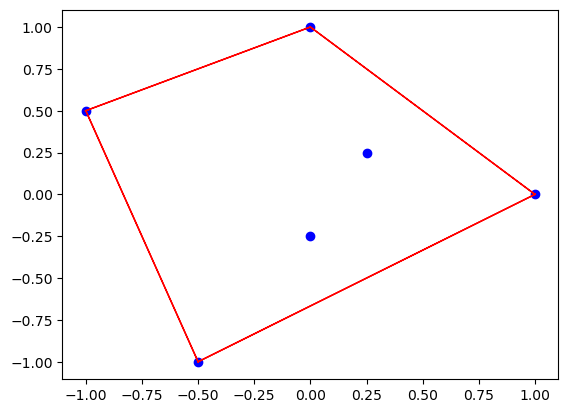

In [150]:
import matplotlib.pyplot as plt

for p in points:
    plt.scatter(p.x, p.y, color="blue")
for i, p in enumerate(edge_sort):
    if (i + 1) >= len(edge_sort):
        plt.arrow(p.x, p.y, edge_sort[0].x - p.x, edge_sort[0].y - p.y, color="red")
    else:
        plt.arrow(p.x, p.y, edge_sort[i+1].x - p.x, edge_sort[i+1].y - p.y, color="red")
plt.show()

In [9]:
from datetime import datetime

formatted_time = datetime.now().strftime('%Y-%m-%d_%H:%M:%S')
print(formatted_time)

2024-04-22_20:24:57


In [10]:
import math
from Exp1_Convex import get_points, Point, cal_cross_product

def left_turn(p1: Point, p2: Point, p3: Point) -> bool:
    v1 = p2 - p1
    v2 = p3 - p2
    return cal_cross_product(v1, v2) > 0

points = get_points(f"./data/Exp1/10points.pkl")

edge_sort = []
    
# find p0
min_y_ind = 0
for ind, point in enumerate(points):
    if point.y < points[min_y_ind].y:
        min_y_ind = ind
edge_sort.append(points[min_y_ind])
points = points[:min_y_ind] + points[min_y_ind+1:]

#按极角排序
def angle(p: Point):
    p0 = edge_sort[0]
    return math.atan2(
        p.y - p0.y,
        p.x - p0.x
    )
sorted_points = sorted(points, key=angle)

#挨个考虑
edge_sort.append(sorted_points[0])
# edge_sort.append(sorted_points[1])
for p in sorted_points[1:]:
    top_p = edge_sort[-1]
    nttop_p = edge_sort[-2]
    while (not left_turn(nttop_p, top_p, p)) and len(edge_sort) >= 3:
        edge_sort.pop()
        top_p = edge_sort[-1]
        nttop_p = edge_sort[-2]
    edge_sort.append(p)
edge_sort


[(97.80199878434698, 4.231224566744096),
 (97.48324794628694, 28.28243405879496),
 (71.29050200364485, 97.79939139925055),
 (0.7619148790308672, 99.44282380811622),
 (46.362150201168305, 7.789818521947112)]

In [7]:
sorted_points

[(97.48324794628694, 28.28243405879496),
 (71.29050200364485, 97.79939139925055),
 (44.54548539058947, 89.35817628501619),
 (41.12351185377169, 74.42123029276107),
 (0.7619148790308672, 99.44282380811622),
 (17.06674672691819, 71.90252588923389),
 (50.93895599919449, 42.33918916251411),
 (51.57658608557484, 24.418044733383702),
 (46.362150201168305, 7.789818521947112)]

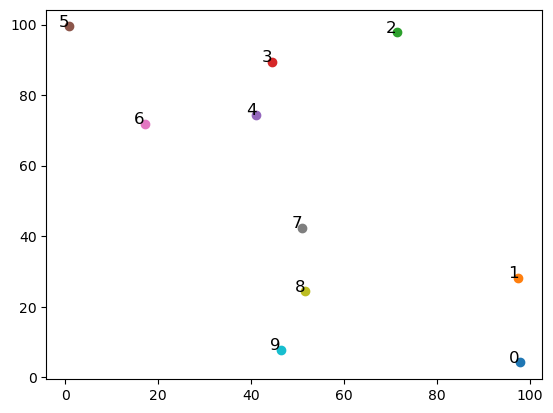

In [13]:
import matplotlib.pyplot as plt

plt.scatter(edge_sort[0].x, edge_sort[0].y)
plt.text(edge_sort[0].x, edge_sort[0].y, str(0), fontsize=12, ha='right')
for i, p in enumerate(sorted_points):
    plt.scatter(p.x, p.y)
    plt.text(p.x, p.y, str(i+1), fontsize=12, ha='right')
plt.show()

In [1]:
from Exp1_Convex import Point
a = Point(1, 2)
b = Point(2, 3)
print(b -  a)

(1, 1)


In [1]:
from Exp1_Convex import get_points, Point, GrahamScan, cal_cross_product, left_turn
from typing import List, Optional
import math

points = get_points(f"./data/Exp1/10points.pkl")

def conquer(points: List[Point]) -> List[Point]:
    # preprocess
    if len(points) == 3:
        if left_turn(points[0], points[1], points[2]):
            return points
        else:
            return [points[0], points[2], points[1]]
    elif len(points) <= 2:
        return points
    
    min_x = float("inf")
    max_x = float("-inf")
    for p in points:
        if p.x > max_x:
            max_x = p.x
        if p.x < min_x:
            min_x = p.x
    mid_x = (min_x + max_x) / 2
    
    QL = []
    QR = []
    for p in points:
        if p.x <= mid_x:
            QL.append(p)
        else:
            QR.append(p)
    
    QL = conquer(QL)
    QR = conquer(QR)
    
    # 构造三个序列
    def get_inside_point(a: Point, b: Point, c: Point):
        # 找三角形的一个内点，凸包上连续三点的三角形的内点肯定也在凸包内
        core_x = (a.x + b.x + c.x) / 3
        core_y = (a.y + b.y + c.y) / 3
        return Point(core_x, core_y)
    try:
        p_inside = get_inside_point(QL[0], QL[1], QL[2]) # 找凸包QL的一个内点
    except IndexError:
        if len(QL) == 2:
            p_inside = Point((QL[0].x + QL[1].x) / 2, (QL[0].y + QL[1].y) / 2)
        elif len(QL) == 1:
            p_inside = QL[0]
    # 在CH(QR)中找与p的极角最大和最小顶点u和v
    min_angle = math.pi
    max_angle = -math.pi
    def cal_angle(p1: Point, p2: Point):
        return math.atan2(p2.y - p1.y, p2.x - p1.x)
    for ind, p in enumerate(QR):
        angle = cal_angle(p_inside, p)
        if angle > max_angle:
            v_id = ind
            max_angle = angle
        if angle < min_angle:
            u_id = ind
            min_angle = angle
    
    seq_1 = QL #按逆时针方向排列的CH(QL)的所有顶点
    
    if v_id < u_id: #按逆时针方向排列的CH(QR)从u到v的顶点
        seq_2 = (QR + QR)[u_id:v_id+len(QR)+1]
    else:
        seq_2 = QR[u_id:v_id+1]
        
    if v_id < u_id: #按顺时针方向排列的CH(QR)从u到v的顶点
        seq_3 = list(reversed(QR[v_id+1:u_id]))
    else:
        seq_3 = list(reversed((QR + QR)[v_id+1:u_id+len(QR)]))
    
    def _find_min_angle(p1: Optional[Point]=None, p2: Optional[Point]=None, p3: Optional[Point]=None) -> int:
        """找到与p_inside极角最小的点，返回它的index
        """
        p_list = [p for p in [p1, p2, p3] if p]
        min_angle = math.pi
        for ind, p in enumerate(p_list):
            angle = cal_angle(p_inside, p)
            if angle < min_angle:
                min_ind = ind
                min_angle = angle
        for ind, p in enumerate([p1, p2, p3]):
            if p_list[min_ind] == p:
                return ind+1
    
    merged_seq = []
    while True:
        if len(seq_1) == 0 and len(seq_2) == 0 and len(seq_3) == 0:
            break
        
        top_seq_1 = seq_1[0] if len(seq_1) != 0 else None
        top_seq_2 = seq_2[0] if len(seq_2) != 0 else None
        top_seq_3 = seq_3[0] if len(seq_3) != 0 else None
        
        min_ind = _find_min_angle(top_seq_1, top_seq_2, top_seq_3)
        # seq_name = f"seq_{min_ind}"
        ind2seq = {
            1: seq_1,
            2: seq_2,
            3: seq_3
        }
        merged_seq.append(ind2seq[min_ind][0])
        ind2seq[min_ind].pop(0)

            
    
    return GrahamScan(merged_seq, have_sorted=True)
    
conquer(points)
        

    

[(46.362150201168305, 7.789818521947112),
 (51.57658608557484, 24.418044733383702),
 (97.80199878434698, 4.231224566744096),
 (97.48324794628694, 28.28243405879496),
 (71.29050200364485, 97.79939139925055),
 (0.7619148790308672, 99.44282380811622),
 (17.06674672691819, 71.90252588923389)]

In [14]:
QR = [0, 1, 2, 3, 4]
u_id = 3
v_id = 1

if v_id < u_id: #按逆时针方向排列的CH(QR)从u到v的顶点
    seq_2 = (QR + QR)[u_id:v_id+len(QR)+1]
else:
    seq_2 = QR[u_id:v_id+1]
if v_id < u_id:
    seq_3 = list(reversed(QR[v_id+1:u_id]))
else:
    seq_3 = list(reversed((QR + QR)[v_id+1:u_id+len(QR)]))

print(seq_2)
print(seq_3)

[3, 4, 0, 1]
[2]


In [24]:
from Exp1_Convex import Point
from typing import Optional
import math
p_inside = Point(0, 0)
def cal_angle(p1: Point, p2: Point):
    return math.atan2(p2.y - p1.y, p2.x - p1.x)
def _find_min_angle(p1: Optional[Point]=None, p2: Optional[Point]=None, p3: Optional[Point]=None) -> int:
    """找到与p_inside极角最小的点，返回它的index
    """
    p_list = [p for p in [p1, p2, p3] if p]
    min_angle = math.pi
    for ind, p in enumerate(p_list):
        angle = cal_angle(p_inside, p)
        if angle < min_angle:
            min_ind = ind
            min_angle = angle
    for ind, p in enumerate([p1, p2, p3]):
        if p_list[min_ind] == p:
            return ind+1
seq_1 = [
    Point(0, -2),
    Point(2, -1),
    Point(2, 2),
    Point(0, 3), 
    Point(-2, 1)
]
seq_2 = [
    Point(7, -2),
    Point(9, -1),
    Point(10, 3),
    Point(8, 5)
]
seq_3 = [
    Point(5, 1),
    Point(6, 3)
]

merged_seq = []
while True:
    if len(seq_1) == 0 and len(seq_2) == 0 and len(seq_3) == 0:
        break
    
    top_seq_1 = seq_1[0] if len(seq_1) != 0 else None
    top_seq_2 = seq_2[0] if len(seq_2) != 0 else None
    top_seq_3 = seq_3[0] if len(seq_3) != 0 else None
    
    min_ind = _find_min_angle(top_seq_1, top_seq_2, top_seq_3)
    ind_to_seq_dict = {
        1: seq_1, 
        2: seq_2, 
        3: seq_3
    }
    seq_name = f"seq_{min_ind}"
    merged_seq.append(globals()[seq_name][0])
    try:
        globals()[seq_name] = globals()[seq_name][1:]
    except IndexError:
        globals()[seq_name] = []

merged_seq

[(0, -2),
 (2, -1),
 (7, -2),
 (9, -1),
 (5, 1),
 (10, 3),
 (6, 3),
 (8, 5),
 (2, 2),
 (0, 3),
 (-2, 1)]

In [27]:
cal_angle(Point(0, 0), Point(0, 0))

0.0

In [ ]:
merged_seq = [Point(46.362150201168305, 7.789818521947112), (41.12351185377169, 74.42123029276107), (44.54548539058947, 89.35817628501619), (0.7619148790308672, 99.44282380811622), (17.06674672691819, 71.90252588923389)]

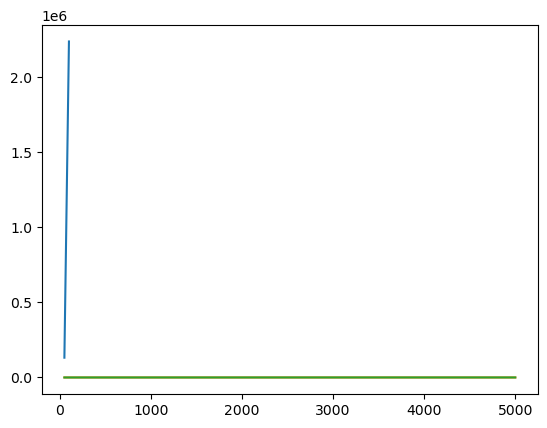

In [5]:
BF = [
    [50, 131748.708],
    [100, 2236623.546]
]
GS = [
    [50, 0.288],
    [100, 0.485],
    [200, 0.968],
    [1000, 4.995],
    [2000, 9.558],
    [5000, 23.889]
]
DAC = [
    [50, 1.770],
    [100, 4.270],
    [200, 7.119],
    [1000, 38.548],
    [2000, 79.777],
    [5000, 183.333]
]
import matplotlib.pyplot as plt
data = BF
plt.plot([d[0] for d in data], [d[1] for d in data])
data = GS
plt.plot([d[0] for d in data], [d[1] for d in data])
data = DAC
plt.plot([d[0] for d in data], [d[1] for d in data])
plt.show()
